In [1]:
import pandas
import numpy
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
%run distance.ipynb
import sympy as sp
from sklearn import manifold
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [3]:
n = 100
RR = []
DD = []
for i in range(n):
  mydata = ['DSentry.txt','DSmid.txt','DSsenior.txt','HRSentry.txt','HRSmid.txt','HRSsenior.txt']
  mylabel = [('Entry-Level','Data Scientist'),('Mid-Level','Data Scientist'),('Senior-Level','Data Scientist'),('Entry-Level','Human Resource Specialist'),('Mid-Level','Human Resource Specialist'),('Senior-Level','Human Resource Specialist')]
  R = []
  I = [] 
  D = []
  for file,label in zip(mydata,mylabel):
    mydata = pandas.read_csv(file,sep='\t')
    mydata = mydata.sample(50,replace=False)
    mydata.description = mydata.description.str.lower() 
    mydata.description = mydata.description.str.replace(r'\b[a-z]\b|\b[0-9]+\b','',regex=True)
    mydata.description = mydata.description.str.replace(r'/',' ',regex=True)
    mydata.description = mydata.description.str.replace(r'.','',regex=True)
    mydata.description = mydata.description.str.replace(r'http\S+','',regex=True)
    description = mydata.description.to_list()
    description = ','.join(description)
    description = word_tokenize(description)
    description = [word for word in description if not word in stop_words]
    description = [word for word in description if not word in [',','@','!','?','.','–',':','#','’','(',')','%','--','-', "'",'&','$','\n']]
    description = [nltk.stem.LancasterStemmer().stem(word) for word in description]
    area = len(description)
    radius = numpy.sqrt(area/numpy.pi)
    area_i = [(term,description.count(term)) for term in description]
    area_i = set(area_i)
    R.append(radius)
    I.append(area_i)
  RR.append(R) 
  for i,j in [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]:
    a = [(k,min(v,vv)) for (k,v) in I[i] for (kk,vv) in I[j] if k==kk]
    area = sum([v for (k,v) in a])
    distance = find_d(area,R[i],R[j])
    D.append(distance)
  DD.append(D)
DD = numpy.mean(numpy.array(DD),axis=0)
RR = numpy.mean(numpy.array(RR),axis=0)
RR

array([77.99181717, 84.8528464 , 87.38856153, 83.18265703, 83.91868023,
       83.09440719])

In [4]:
seed = numpy.random.RandomState(seed=3)
ED = numpy.array([[0,DD[0],DD[1],DD[2]],[DD[0],0,DD[3],DD[4]],[DD[1],DD[3],0,DD[5]],[DD[2],DD[4],DD[5],0]])
print(ED.shape)
mds = manifold.MDS(n_components=2,max_iter=3000,eps=1e-9,random_state=seed,dissimilarity="precomputed",n_jobs=1)
dots = mds.fit(ED).embedding_
print(dots)

(4, 4)
[[  3.83272566  20.73561506]
 [-14.54913195 -16.12077801]
 [-25.62012023   5.99639901]
 [ 36.33652652 -10.61123605]]


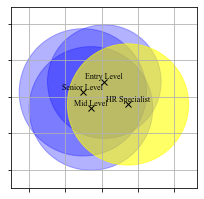

In [10]:
plt.rc("font",family="Times New Roman",size=8) 
fig,ax = plt.subplots(1,1,figsize=(3.34,3.34))
ax.add_patch(plt.Circle((dots[0][0],dots[0][1]),RR[0],color='blue',alpha=0.3))
ax.plot(dots[0][0],dots[0][1],'x',color='black')
ax.text(dots[0][0],dots[0][1]+7,'Entry Level',va='center',ha='center')
ax.add_patch(plt.Circle((dots[1][0],dots[1][1]),RR[1],color='blue',alpha=0.3))
ax.plot(dots[1][0],dots[1][1],'x',color='black')
ax.text(dots[1][0],dots[1][1]+7,'Mid Level',va='center',ha='center')
ax.add_patch(plt.Circle((dots[2][0],dots[2][1]),RR[2],color='blue',alpha=0.3))
ax.plot(dots[2][0],dots[2][1],'x',color='black')
ax.text(dots[2][0],dots[2][1]+7,'Senior Level',va='center',ha='center')
ax.add_patch(plt.Circle((dots[3][0],dots[3][1]),RR[3],color='yellow',alpha=0.6))
ax.plot(dots[3][0],dots[3][1],'x',color='black')
ax.text(dots[3][0],dots[3][1]+7,'HR Specialist',va='center',ha='center')
ax.autoscale()
ax.set_aspect("equal", adjustable="datalim")
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid()
plt.show()
fig.savefig('Venn.png',dpi=300)